In [6]:
import pandas as pd
from datetime import date

# Federal Funds Target Rate (Discontinued) before 2009

df_USD = pd.read_csv("DFEDTAR.csv")
df_USD.columns = ['Date', 'Rate']

# Federal Funds Target Rate Upper Limit after 2009
df_USD2 = pd.read_csv("DFEDTARU.csv")
df_USD2.columns = ['Date', 'Rate']
df_USD2["Rate"] -= 0.125 # Since the range (difference between lower and upper limit) is always 0.25 we deduct 0.125 to have the mid point (target)

# Combining before and after 2009 data frames
df_USD = pd.concat([df_USD, df_USD2], ignore_index=True)

df_USD.Date = pd.to_datetime(df_USD.Date)

# Removing data before the initial date
initial_date = pd.to_datetime("2004-01-01")

df_USD = df_USD[df_USD["Date"]>= initial_date]
df_USD.reset_index(inplace=True, drop=True)

# Adding today's date and rate to the end of data frame to make all dfs to end at the same time
last_rate = df_USD["Rate"][len(df_USD)-1]
today = pd.to_datetime(date.today())
df_USD.loc[len(df_USD)] = [today, last_rate]

# Bank of Canada target rate

df_CAD = pd.read_csv("BankofCanadaRateHistory.csv")
df_CAD.columns = ['Date', 'Rate']
df_CAD["Date"] = pd.to_datetime(df_CAD["Date"])

df_CAD = df_CAD[df_CAD["Date"]>= initial_date]
df_CAD.reset_index(inplace=True, drop=True)
last_rate = df_CAD["Rate"][len(df_CAD)-1]
df_CAD.loc[len(df_CAD)] = [today, last_rate]

# Create a DataFrame with all dates in a given year
all_dates = pd.date_range(start=initial_date, end=today, freq='D')
all_dates_df = pd.DataFrame({'Date': all_dates})

# Merge with forward fill
df_CAD = pd.merge_asof(all_dates_df, df_CAD, on='Date').ffill()

# Bank of England

df_GBP = pd.read_csv("Bank Rate history and data  Bank of England Database.csv")
df_GBP.columns = ['Date', 'Rate']
df_GBP["Date"] = pd.to_datetime(df_GBP["Date"])
df_GBP.sort_values(by="Date", ascending=True, inplace=True)
df_GBP = df_GBP[df_GBP["Date"]>= initial_date]
df_GBP.reset_index(inplace=True, drop=True)
last_rate = df_GBP["Rate"][len(df_GBP)-1]
df_GBP.loc[len(df_GBP)] = [today, last_rate]

# Merge with forward fill
df_GBP = pd.merge_asof(all_dates_df, df_GBP, on='Date').ffill()

# European Central Bank

df_EUR = pd.read_csv("ECB Data Portal_20240724135100.csv")
df_EUR.drop(columns=["TIME PERIOD",
                     "Deposit facility - date of changes (raw data) - Level (FM.D.U2.EUR.4F.KR.DFR.LEV)",
                      "Marginal lending facility - date of changes (raw data) - Level (FM.D.U2.EUR.4F.KR.MLFR.LEV)"],
                      inplace=True)
df_EUR.columns = ['Date', 'Rate']
df_EUR["Date"] = pd.to_datetime(df_EUR["Date"])
df_EUR.sort_values(by="Date", ascending=True, inplace=True)
df_EUR = df_EUR[df_EUR["Date"]>= initial_date]
df_EUR.reset_index(inplace=True, drop=True)

# Merge with forward fill
df_EUR = pd.merge_asof(all_dates_df, df_EUR, on='Date').ffill()

In [27]:
# # Create a column to identify changes in Rate
# df_EUR['Rate_Change'] = df_EUR['Rate'] != df_EUR['Rate'].shift(1)

# # Include the first row as it is needed for the initial Rate
# df_EUR.loc[0, 'Rate_Change'] = True

# # Filter the DataFrame to include only rows where the Rate changes
# df_filtered_EUR = df_EUR[df_EUR['Rate_Change']].drop(columns=['Rate_Change'])
# df_filtered_EUR.reset_index(inplace=True, drop=True)
# last_rate = df_filtered_EUR["Rate"][len(df_filtered_EUR)-1]
# df_filtered_EUR.loc[len(df_filtered_EUR)] = [today, last_rate]
# df_filtered_EUR.tail()

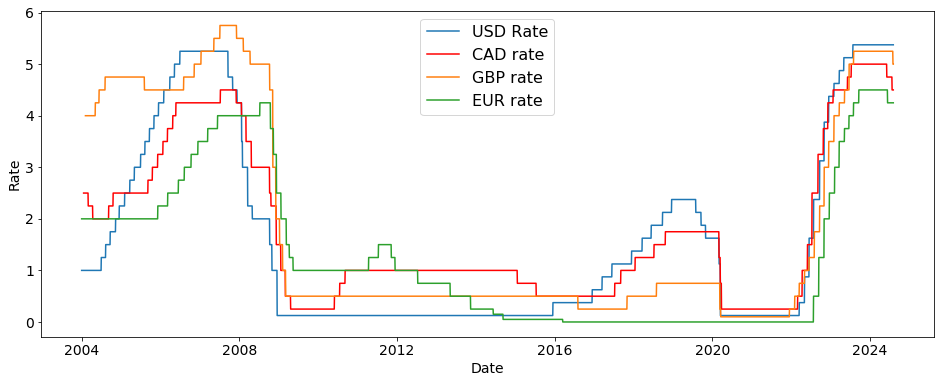

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Rate", fontsize=14)
plt.plot(df_USD["Date"], df_USD["Rate"], label="USD Rate")
plt.plot(df_CAD["Date"], df_CAD["Rate"], label="CAD rate" , color="red")
plt.plot(df_GBP["Date"], df_GBP["Rate"], label="GBP rate")
plt.plot(df_EUR["Date"], df_EUR["Rate"], label="EUR rate")

plt.legend(fontsize=16)

In [18]:
# df_unemployment = pd.read_csv("Canada unemployment monthly 15 years and above.csv")
# df_unemployment = df_unemployment.T
# df_unemployment.reset_index(inplace=True)
# df_unemployment.drop(index=0, inplace=True)

# # Make the first row the header
# df_unemployment.columns = df_unemployment.iloc[0]
# df_unemployment = df_unemployment[1:].reset_index(drop=True)

# df_unemployment = df_unemployment[["Population centre and rural areas", "Total, all population centres and rural areas"]]
# df_unemployment.columns = ["Date", "Rate"]
# df_unemployment["Date"] = pd.to_datetime(df_unemployment["Date"], format="%y-%b")
# df_unemployment

In [3]:
df_unemployment = pd.read_csv("Canada unemployment yearly.csv")
df_unemployment = df_unemployment.T
df_unemployment.reset_index(inplace=True, drop=True)
# df_unemployment.drop(index=0, inplace=True)

# Make the first row the header
df_unemployment.columns = df_unemployment.iloc[0]
df_unemployment = df_unemployment[1:].reset_index(drop=True)

df_unemployment = df_unemployment[["Educational attainment 5", "Total, all education levels"]]
df_unemployment.columns = ["Date", "Rate"]
df_unemployment["Date"] = df_unemployment["Date"].astype(int)
df_unemployment["Date"] = pd.to_datetime(df_unemployment["Date"], format="%Y")
df_unemployment["Rate"] = df_unemployment["Rate"].astype(float)
df_unemployment = df_unemployment[df_unemployment["Date"]>= initial_date]
df_unemployment.reset_index(drop=True, inplace=True)

# Merge with forward fill
df_unemployment = pd.merge_asof(all_dates_df, df_unemployment, on='Date').ffill()

df_unemployment

,Date,Rate
0,2004-01-01,5.9
1,2004-01-02,5.9
2,2004-01-03,5.9
3,2004-01-04,5.9
4,2004-01-05,5.9
...,...,...
7517,2024-07-31,4.5
7518,2024-08-01,4.5
7519,2024-08-02,4.5
7520,2024-08-03,4.5


In [28]:
def plot_two_y_axes(df_1_x: pd.Series, df_1_y : pd.Series , x_lable: str, y1_lable: str,
                     df_2_x: pd.Series, df_2_y : pd.Series, y2_lable: str ,
                       y2_ticks:int =8, y1_color:str ="red", y2_color:str ="blue"):
    
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    from matplotlib.ticker import MaxNLocator

    # Create a figure and a set of subplots
    fig, ax1 = plt.subplots(figsize=(16, 6))

    # Plot on the primary y-axis
    ax1.set_xlabel(x_lable, fontsize=14)
    ax1.set_ylabel(y1_lable, fontsize=14, color= y1_color)
    ax1.plot(df_1_x, df_1_y, label=y1_lable, color=y1_color)
    ax1.tick_params(axis='y', labelcolor=y1_color, labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)

    # Create a secondary y-axis
    ax2 = ax1.twinx()
    ax2.set_ylabel(y2_lable, fontsize=14, color=y2_color)
    ax2.plot(df_2_x, df_2_y, label=y2_lable, color=y2_color)
    ax2.tick_params(axis='y', labelcolor=y2_color, labelsize=14)

    # Use MaxNLocator to reduce the number of y-ticks
    ax2.yaxis.set_major_locator(MaxNLocator(nbins=y2_ticks))

    # Set up x-axis ticks and grid
    locator = mdates.YearLocator()  # Set major ticks to every year
    ax1.xaxis.set_major_locator(locator)
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax1.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

    # Rotate x-ticks for better readability
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

    # Add a legend
    fig.legend(loc="upper left", bbox_to_anchor=(0.3, 0.9), fontsize=16)

    plt.show()

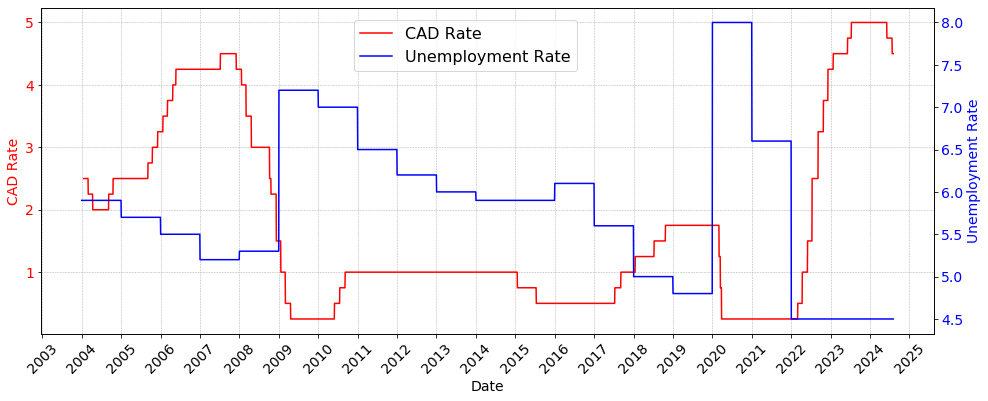

In [29]:
plot_two_y_axes(df_CAD["Date"],df_CAD["Rate"], "Date", "CAD Rate",
                 df_unemployment["Date"], df_unemployment["Rate"],"Unemployment Rate")

In [30]:
df_CPI = pd.read_csv("CPI.csv")
df_CPI = df_CPI.T
df_CPI.reset_index(inplace=True)

# Make the first row the header
df_CPI.columns = df_CPI.iloc[0]
df_CPI = df_CPI[1:].reset_index(drop=True)

df_CPI = df_CPI[["Products and product groups 3 4", "All-items"]]
df_CPI.columns = ["Date", "CPI"]

#Finding the index where the Date format changes
index_change = df_CPI.index[df_CPI["Date"]=="1-Jan"].tolist()[0]

df_CPI["Date"][:index_change] = [item[:4]+ "19"+ item[4:] for item in df_CPI["Date"][:index_change]]
df_CPI["Date"][index_change:index_change+108] = ["200"+ item for item in df_CPI["Date"][index_change:index_change+108]]

df_CPI["Date"][:index_change] = pd.to_datetime(df_CPI["Date"][:index_change], format="%b-%Y")
df_CPI["Date"][index_change:index_change+108] = pd.to_datetime(df_CPI["Date"][index_change:index_change+108], format="%Y-%b")
df_CPI["Date"][index_change+108:] = pd.to_datetime(df_CPI["Date"][index_change+108:], format="%y-%b")  
df_CPI["CPI"] = df_CPI["CPI"].astype(float)

# Calculate month-to-month percentage change
df_CPI['Month-to-Month % Change'] = df_CPI['CPI'].pct_change(periods=1) * 100

# Calculate year-to-year percentage change
df_CPI['Year-to-Year % Change'] = df_CPI['CPI'].pct_change(periods=12) * 100

df_CPI = df_CPI[df_CPI["Date"]>= initial_date]
df_CPI.reset_index(drop=True, inplace=True)

df_CPI['Date'] = pd.to_datetime(df_CPI['Date'])

df_CPI

,Date,CPI,Month-to-Month % Change,Year-to-Year % Change
0,2004-01-01,103.3,0.096899,1.274510
1,2004-02-01,103.5,0.193611,0.680934
2,2004-03-01,103.9,0.386473,0.775946
3,2004-04-01,104.1,0.192493,1.660156
4,2004-05-01,105.0,0.864553,2.439024
...,...,...,...,...
241,2024-02-01,158.8,0.315856,2.783172
242,2024-03-01,159.8,0.629723,2.897618
243,2024-04-01,160.6,0.500626,2.685422
244,2024-05-01,161.5,0.560399,2.866242


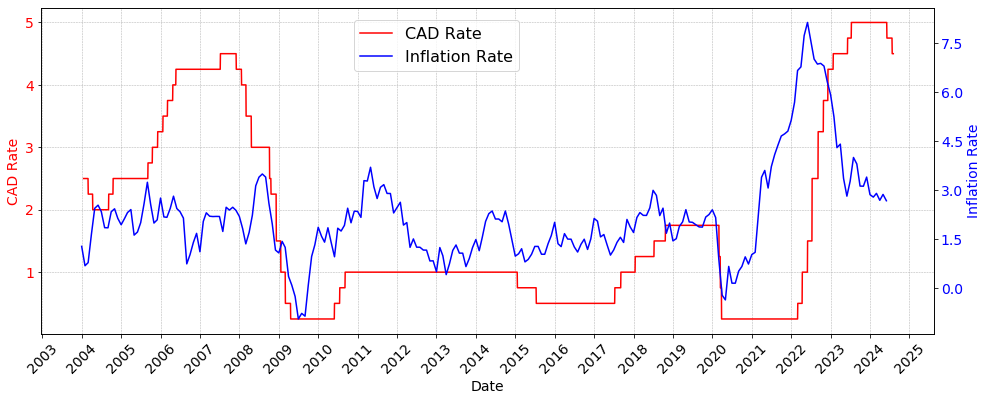

In [31]:
plot_two_y_axes(df_CAD["Date"],df_CAD["Rate"], "Date", "CAD Rate",
                 df_CPI["Date"], df_CPI["Year-to-Year % Change"],"Inflation Rate")

In [8]:
# S&P 500

df_sp = pd.read_csv("S&P 500 Historical Data 2.csv")
df_sp["Date"] = pd.to_datetime(df_sp["Date"])
df_sp.sort_values(by="Date", inplace=True)
df_sp.reset_index(drop=True, inplace=True)

df_sp2 = pd.read_csv("S&P 500 Historical Data 3.csv")
df_sp2["Date"] = pd.to_datetime(df_sp2["Date"])
df_sp2.sort_values(by="Date", inplace=True)
df_sp2.reset_index(drop=True, inplace=True)

df_sp = pd.concat([df_sp, df_sp2], ignore_index=True)

for col in df_sp.columns[1:5]:
    df_sp[col] = df_sp[col].str.replace(',', '').astype(float)

df_sp = df_sp[df_sp["Date"]>= initial_date]
df_sp.reset_index(inplace=True, drop=True)
df_sp

,Date,Price,Open,High,Low,Vol.,Change %
0,2004-01-02,1108.50,1111.90,1118.80,1105.10,NaN,-0.31%
1,2004-01-05,1122.20,1108.50,1122.20,1108.50,NaN,1.24%
2,2004-01-06,1123.70,1122.20,1124.50,1118.40,NaN,0.13%
3,2004-01-07,1126.30,1123.70,1126.30,1116.50,NaN,0.23%
4,2004-01-08,1131.90,1126.30,1131.90,1124.90,NaN,0.50%
...,...,...,...,...,...,...,...
5169,2024-07-18,5544.59,5608.56,5614.05,5522.81,NaN,-0.78%
5170,2024-07-19,5505.00,5543.37,5557.50,5497.04,NaN,-0.71%
5171,2024-07-22,5564.41,5544.54,5570.36,5529.04,NaN,1.08%
5172,2024-07-23,5555.74,5565.30,5585.34,5550.90,NaN,-0.16%


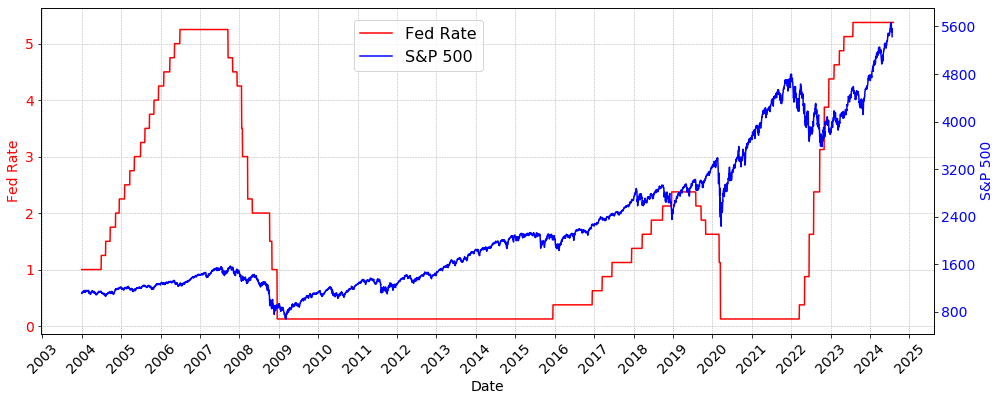

In [32]:
plot_two_y_axes(df_USD["Date"],df_USD["Rate"], "Date", "Fed Rate",
                 df_sp["Date"], df_sp["Price"],"S&P 500")

In [35]:
df_fx1 = pd.read_csv("LEGACY_NOON_RATES.csv")
df_fx1["date"] = pd.to_datetime(df_fx1["date"])
df_fx1

,date,EURO,JPY,GBP,USD
0,2007-05-01,1.5081,0.009257,2.2171,1.1089
1,2007-05-02,1.5074,0.009235,2.2073,1.1087
2,2007-05-03,1.5017,0.009199,2.2005,1.1070
3,2007-05-04,1.5040,0.009211,2.2062,1.1069
4,2007-05-07,1.5010,0.009189,2.1986,1.1024
...,...,...,...,...,...
2499,2017-04-24,1.4662,0.012320,1.7278,1.3516
2500,2017-04-25,1.4896,0.012280,1.7476,1.3615
2501,2017-04-26,1.4778,0.012190,1.7449,1.3592
2502,2017-04-27,1.4847,0.012300,1.7615,1.3667


In [51]:
df_fx2 = pd.read_csv("FX_RATES_DAILY-sd-2017-01-03.csv")
df_fx2["date"] = pd.to_datetime(df_fx2["date"])
df_fx2.columns = ["date","EURO", "JPY", "GBP", "USD"]
df_fx2

,date,EURO,JPY,GBP,USD
0,2017-01-03,1.3973,0.01140,1.6459,1.3435
1,2017-01-04,1.3930,0.01134,1.6377,1.3315
2,2017-01-05,1.4008,0.01145,1.6400,1.3244
3,2017-01-06,1.3953,0.01133,1.6275,1.3214
4,2017-01-09,1.3967,0.01138,1.6084,1.3240
...,...,...,...,...,...
1890,2024-07-29,1.4986,0.00900,1.7800,1.3852
1891,2024-07-30,1.4974,0.00900,1.7775,1.3851
1892,2024-07-31,1.4949,0.00918,1.7735,1.3809
1893,2024-08-01,1.4943,0.00923,1.7684,1.3846


In [52]:
df_fx = pd.concat([df_fx1, df_fx2], ignore_index=True)
df_fx


,date,EURO,JPY,GBP,USD
0,2007-05-01,1.5081,0.009257,2.2171,1.1089
1,2007-05-02,1.5074,0.009235,2.2073,1.1087
2,2007-05-03,1.5017,0.009199,2.2005,1.1070
3,2007-05-04,1.5040,0.009211,2.2062,1.1069
4,2007-05-07,1.5010,0.009189,2.1986,1.1024
...,...,...,...,...,...
4394,2024-07-29,1.4986,0.009000,1.7800,1.3852
4395,2024-07-30,1.4974,0.009000,1.7775,1.3851
4396,2024-07-31,1.4949,0.009180,1.7735,1.3809
4397,2024-08-01,1.4943,0.009230,1.7684,1.3846


In [58]:
df_diff_USD_CAD = df_USD
df_diff_USD_CAD["Rate"] = df_USD["Rate"] - df_CAD["Rate"]
df_diff_USD_CAD

,Date,Rate
0,2004-01-01,NaN
1,2004-01-02,NaN
2,2004-01-03,NaN
3,2004-01-04,NaN
4,2004-01-05,NaN
...,...,...
7511,2024-07-25,0.875
7512,2024-07-26,0.875
7513,2024-07-27,0.875
7514,2024-07-28,0.875


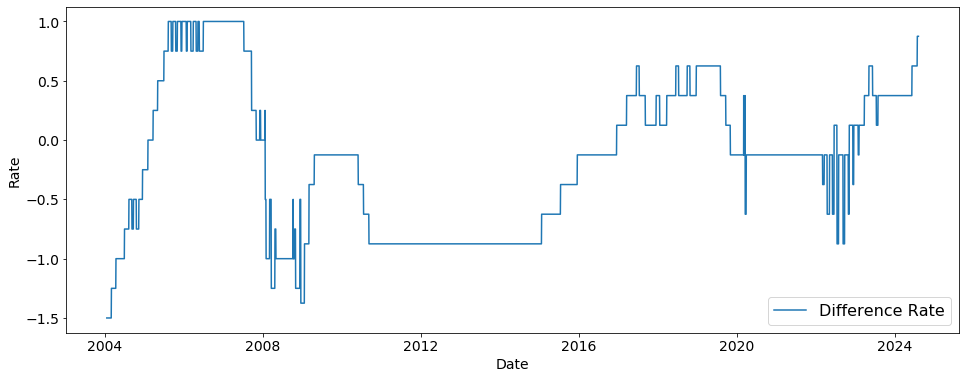

In [59]:
plt.figure(figsize=(16,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Rate", fontsize=14)
plt.plot(df_diff_USD_CAD["Date"], df_diff_USD_CAD["Rate"], label="Difference Rate")

plt.legend(fontsize=16)

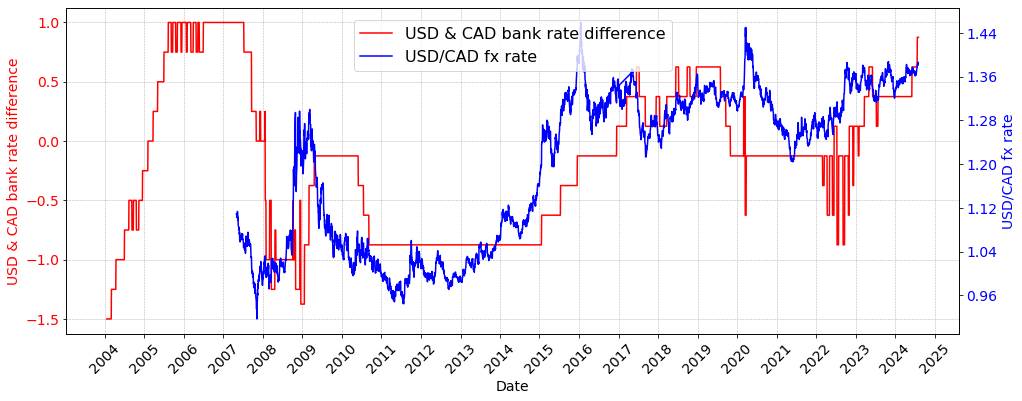

In [60]:
plot_two_y_axes(df_diff_USD_CAD["Date"], df_diff_USD_CAD["Rate"], "Date", "USD & CAD bank rate difference", df_fx["date"], df_fx["USD"], "USD/CAD fx rate")


In [5]:
from bs4 import BeautifulSoup
import requests
# import lxml

response = requests.get("https://www.bankofcanada.ca/core-functions/monetary-policy/key-interest-rate/?theme_mode=dark")
BOC = response.text
soup = BeautifulSoup(BOC, "html.parser")

rows = soup.find_all(name="tr")
date = rows[1].find_all("td")[0].text
rate = rows[1].find_all("td")[1].text
change = rows[1].find_all("td")[2].text

'July 24, 2024'

In [18]:
rows[3].find_all("td")[2].text == "---"

False

In [ ]:
### Using Alpha Vantage to fetch data

import requests
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv()

Alpha_Vantage_API_Key= os.getenv("ALPHA_VANTAGE_API_KEY")

alpha_endpoint = "https://www.alphavantage.co/query"

#     "outputsize": "full",
params = {
    "function": "TIME_SERIES_DAILY",
    "symbol": "SPY",
    "apikey": Alpha_Vantage_API_Key,
}

response = requests.get(url=alpha_endpoint, params=params)
data = response.json()

# 1 way to convert data

time_series = data["Time Series (Daily)"]
data_list = [value for (key,value) in time_series.items()]
dates = [key for (key,value) in time_series.items()]
opens = [item["1. open"] for item in data_list]
highs = [item["2. high"] for item in data_list]
lows = [item["3. low"] for item in data_list]
closes = [item["4. close"] for item in data_list]
volumes = [item["5. volume"] for item in data_list]

data_dict = {
    "date": dates,
    "open": opens,
    "high" : highs,
    "low" : lows,
    "close": closes,
    "volume": volumes,
    }

df_data = pd.DataFrame(data_dict)

# Another way to Convert to DataFrame
df = pd.DataFrame.from_dict(time_series, orient="index")

# Converting index to datetime
df.index = pd.to_datetime(df.index)

# Converting data types to float
df = df.astype(float)

# Resetting the index to make dates a column
df.reset_index(inplace=True)

# Renaming the columns
df.columns = ['date', 'open', 'high', 'low', 'close', 'volume']